In [1]:
import numpy as np 
from numpy import asarray
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
import os
import shutil 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
import tensorflow.keras.layers
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
data_directory = 'C:/Users/ndahr/Desktop/GAR-SEG/Card_Glass/'

In [3]:
data_list = os.listdir(data_directory)
train_list = []
label_list = []
text_list = []

for d in data_list:
    train_list.append(d + "/img.png")
    label_list.append(d + "/label.png")
    text_list.append(d + "/label_names.txt")

In [4]:
print(text_list[0])

cardboard112_json/label_names.txt


In [5]:
print(len(train_list))
print(len(label_list))
print(len(text_list))

240
240
240


In [6]:
height , width = (512,512)
m = len(label_list)
X = np.zeros([m, height, width, 3])
Y = np.zeros([m, height, width, 3])

for i in tqdm(range(m)):
    img = mpimg.imread(data_directory  + train_list[i])
    image = Image.open(data_directory  + train_list[i])
    if image.mode == 'RGBA':
        image = image.convert("RGB")
        img = np.array(image)


    img1 = mpimg.imread(data_directory  + label_list[i])
    image1 = Image.open(data_directory  + label_list[i])
    if image1.mode == 'P':
        image1 = image1.convert('RGB')
        img1 = np.array(image1)
    X[i] = img
    Y[i] = img1


100%|██████████| 240/240 [00:05<00:00, 40.63it/s]


In [7]:
for n in tqdm(range(m)):
    for i in range(height):
        for j in range(width):
            for c in range(3):
                if(Y[n,i,j,c] > 0):
                    Y[n,i,j,c] = 1

100%|██████████| 240/240 [02:14<00:00,  1.79it/s]


In [8]:
colour_label = np.array([[0.0 ,0.0 ,0.0], [1.0,0.0,0.0]])

In [9]:
def change_colour(t, k):
  if(k == "'_background_\n'"):
    t = [0.0, 0.0, 0.0]
    #print('background')
  elif(k == "cardboard\n"):
    t = [0.0, 0.0, 1.0]
    #print("C")
  elif(k == "glass\n"):
    t = [0.0, 1.0, 0.0]
    #print("D")
  elif(k == "metal\n"):
    t = [0.0, 1.0, 1.0]
    #print("EL")
  elif(k == "paper\n"):
    t = [1.0, 0.0, 0.0]
    #print("ER")
  elif(k == "plastic\n"):
    t = [1.0, 0, 1.0]
    #print("L")
  elif(k == "trash\n"):
    t = [1.0, 1.0, 0.0]
    #print("S")
  else:
    t = [0.0,0.0,0.0]
  return t


In [10]:
def lab_checker(t, n):
  #print('we r in')
  f = open(data_directory + text_list[n], 'r')
  fil = f.readlines()
  counter = 0
  
  for line in fil:
    if(tuple(t) == tuple(colour_label[counter])):
      t = change_colour(t, line)
      return np.array(t)
    counter = counter + 1
  f.close()
  return np.array(t)


In [11]:
for n in tqdm(range(m)):
    for i in range(height):
        for j in range(width):
            t = Y[n, i, j, :]
            Y[n, i, j, :] = lab_checker(t, n)

100%|██████████| 240/240 [1:35:20<00:00, 23.84s/it]


In [12]:
np.save('X-CAR-file',X)
np.save('Y-CAR-file',Y)

In [12]:
import cv2
import numpy as np
from tqdm import tqdm
X = np.load('C:/Users/ndahr/Desktop/GAR-SEG/X-CAR-file.npy')
Y = np.load('C:/Users/ndahr/Desktop/GAR-SEG/Y-CAR-file.npy')
x_array = list()
y_array = list()
for i in tqdm(range(len(X))):
    x = cv2.resize(X[i], (128,128))
    y = cv2.resize(Y[i], (128,128))
    x_array.append(x)
    y_array.append(y)


X128 = np.array(x_array)
Y128 = np.array(y_array)
np.save('X-CAR-GLAS',X128)
np.save('Y-CAR-GLAS',Y128)

100%|██████████| 240/240 [00:00<00:00, 2455.50it/s]


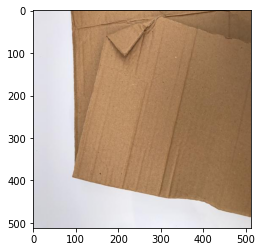

In [10]:
import matplotlib.pyplot as plt 
plt.imshow(X[100])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Z, test_size=0.2, random_state=42)

In [ ]:
# Function for a single resolution convolution operations

def conv_layer(input_layer, conv_channels, kernel_size = (3,3), pool_stride = (2,2), dropout_rate = 0.2, padding = 'same', activation = 'relu'):        
    print(input_layer.shape)
    layer_1 = tf.keras.layers.Conv2D(conv_channels, kernel_size, activation = activation, padding = padding, kernel_initializer = 'he_normal')(input_layer)
    print(layer_1.shape)
    layer_2 = tf.keras.layers.BatchNormalization()(layer_1)
    layer_3 = tf.keras.layers.Dropout(dropout_rate)(layer_2)
    layer_4 = tf.keras.layers.Conv2D(conv_channels, kernel_size, activation = activation, padding = padding, kernel_initializer = 'he_normal')(layer_3)
    layer_5 = tf.keras.layers.BatchNormalization()(layer_4)
    layer_6 = tf.keras.layers.MaxPool2D(pool_stride)(layer_5)
    
    return layer_1,layer_6

In [ ]:
# Function for a single resolution convolution operation at the terminal position

def terminal_conv_layer(input_layer, conv_channels, kernel_size = (3,3), dropout_rate = 0.2, padding = 'same', activation = 'relu'):
    
    layer_1 = tf.keras.layers.Conv2D(conv_channels, kernel_size, activation = activation, padding = padding, kernel_initializer = 'he_normal')(input_layer)
    layer_2 = tf.keras.layers.BatchNormalization()(layer_1)
    layer_3 = tf.keras.layers.Dropout(dropout_rate)(layer_2)
    layer_4 = tf.keras.layers.Conv2D(conv_channels, kernel_size, activation = activation, padding = padding, kernel_initializer = 'he_normal')(layer_3)
    layer_5 = tf.keras.layers.BatchNormalization()(layer_4)
    
    return layer_5

In [ ]:
# Function for a single resolution transpose convolution operation

def transpose_conv_layer(input_layer, skip_layer, conv_channels, kernel_size = (3,3), transpose_kernel_size = (2,2), dropout_rate = 0.2, padding = 'same', activation = 'relu', transpose_strides = (2,2)):
    print(input_layer.shape)
    layer_1 = tf.keras.layers.Conv2DTranspose(conv_channels, transpose_kernel_size, strides = transpose_strides, padding = padding )(input_layer)
    print(layer_1.shape, skip_layer.shape)
    layer_2 = tf.keras.layers.concatenate([layer_1, skip_layer], axis = 3)
    
    layer_3 = tf.keras.layers.Conv2D(conv_channels, kernel_size, activation = activation, padding = padding, kernel_initializer = 'he_normal')(layer_2)
    layer_4 = tf.keras.layers.BatchNormalization()(layer_3)
    layer_5 = tf.keras.layers.Dropout(dropout_rate)(layer_4)
    layer_6 = tf.keras.layers.Conv2D(conv_channels, kernel_size, activation = activation, padding = padding, kernel_initializer = 'he_normal')(layer_5)
    layer_7 = tf.keras.layers.BatchNormalization()(layer_6)    
    
    return layer_7

In [ ]:
def modified_unet_model(height, width, image_channels):
    
    inputs = tf.keras.layers.Input((height, width, image_channels))
    normalized_inputs = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

    S1,D1 = conv_layer(normalized_inputs, 32)
    S2,D2 = conv_layer(D1, 64)
    S3,D3 = conv_layer(D2, 128)
    S4,D4 = conv_layer(D3, 256)
    S5,D5 = conv_layer(D4, 512)

    T1 = terminal_conv_layer(D5, 1024)

    U1 = transpose_conv_layer(T1, S5, 512)
    U2 = transpose_conv_layer(U1, S4, 256)
    U3 = transpose_conv_layer(U2, S3, 128)
    U4 = transpose_conv_layer(U3, S2, 64)
    U5 = transpose_conv_layer(U4, S1, 32)

    outputs = tf.keras.layers.Conv2D(3,(1,1), activation = tf.nn.relu)(U5)

    model = Model(inputs = [inputs], outputs = [outputs])
    
    model.summary()
    
    return model

In [ ]:
def train_the_model(X,Y,optimizer,loss,metrics,epochs,verbose):
    
    h = X.shape[1]
    
    w = X.shape[2]
    c = X.shape[3]
    print(h, w, c)
    
    unet_model = modified_unet_model(h,w,c)
    
    unet_model.compile(optimizer = optimizer, loss = loss, metrics = [metrics])
    history = unet_model.fit(X,Y,validation_data= (x_test, y_test),epochs = epochs, verbose = verbose, batch_size = 32)
    
    return history, unet_model

In [ ]:
model_history , trained_model = train_the_model(x_train,y_train,'adam','mean_squared_error','acc',600,1)

In [ ]:
trained_model.save('weights.h5')

In [ ]:
plt.imshow(Y[360])

In [ ]:
print(len(x_test))

In [ ]:
n = 100

i = x_test[n]
'''
image = Image.open(data_directory  + train_list[n])
if image.mode == 'RGBA':
    image = image.convert("RGB")
    i = np.array(image)

'''
i = i.reshape((1,64,64,3))


print(i.shape)
img1 = trained_model.predict(i)

In [ ]:
figure, axis = plt.subplots(1,3)
axis[0].imshow(i[0])
axis[0].set_title("Image")

axis[1].imshow(y_test[n])
axis[1].set_title("Actual")

axis[2].imshow(img1[0])
axis[2].set_title("Predicted")


plt.show()


In [ ]:
i = x_test[100]

i = i.reshape((1,64,64,3))

y_pred = trained_model.predict(i)
y_true = y_test[100]

In [ ]:
intersection = np.sum(np.logical_and(y_true, y_pred))
union = np.sum(np.logical_or(y_pred, y_true))
iou = np.mean((intersection)/union)
dice = 2*np.mean(intersection/(np.sum(y_pred)+np.sum(y_true)))


In [ ]:
print(iou)

In [ ]:
print(dice)

In [ ]:
Y_Pred = trained_model.predict(X)

In [ ]:
for n in tqdm(range(m)):
    for i in range(height):
        for j in range(width):
            for c in range(3):
                if(Y_Pred[n,i,j,c] > 0):
                    Y_Pred[n,i,j,c] = 1

In [ ]:
intersection = np.sum(np.logical_and(Z, Y_Pred))
union = np.sum(np.logical_or(Y_Pred, Z))
iou = np.mean((intersection)/union)
dice = 2*np.mean(intersection/(np.sum(Y_Pred)+np.sum(Z)))

In [ ]:
print(data_list[5])
for d in range(len(data_list)):
    plt.imsave(data_directory + data_list[d] + "/label_new.png", Z[d])
    plt.imsave(data_directory + data_list[d] + "/pred.png", Y_Pred[d])


In [ ]:
trained_model.save("model")

In [ ]:
classinter = [0, 0, 0, 0, 0, 0]
classunion = [0, 0, 0, 0, 0, 0]

In [ ]:
def classin(r, cl):
    if(r == tuple([0.0, 0.0, 1.0])):
        cl[0] = cl[0] + 1
    elif(r == tuple([0.0, 1.0, 0.0])):
        cl[1] = cl[1] + 1
    elif(r == tuple([0.0, 1.0, 1.0])):
        cl[2] = cl[2] + 1
    elif(r == tuple([1.0, 0.0, 0.0])):
        cl[3] = cl[3] + 1
    elif(r == tuple([1.0, 0.0, 1.0])):
        cl[4] = cl[4] + 1
    elif(r == tuple([1.0, 1.0, 0.0])):
        cl[5] = cl[5] + 1
    return cl


In [ ]:
def classun(r, cl):
    if(r == tuple([0.0, 0.0, 1.0])):
        cl[0] = cl[0] + 1
    elif(r == tuple([0.0, 1.0, 0.0])):
        cl[1] = cl[1] + 1
    elif(r == tuple([0.0, 1.0, 1.0])):
        cl[2] = cl[2] + 1
    elif(r == tuple([1.0, 0.0, 0.0])):
        cl[3] = cl[3] + 1
    elif(r == tuple([1.0, 0.0, 1.0])):
        cl[4] = cl[4] + 1
    elif(r == tuple([1.0, 1.0, 0.0])):
        cl[5] = cl[5] + 1
    return cl

In [ ]:
for n in tqdm(range(m)):
    for i in range(height):
        for j in range(width):
            yp = tuple(Y_Pred[n, i, j, :])
            yt = tuple(Z[n, i, j, :])
            if(yp == yt):
                classinter = classin(yp, classinter)
                classunion = classun(yt, classunion)
            else:
                classunion = classun(yt, classunion)
                classunion = classun(yp, classunion)


In [ ]:
print("IOU Score Class Wise")
print("#######################")
print("Center:    {}", (classinter[0]/classunion[0])*100)
print("Donut:     {}", (classinter[1]/classunion[1])*100)
print("Edge Loc:  {}", (classinter[2]/classunion[2])*100)
print("Edge Ring: {}", (classinter[3]/classunion[3])*100)
print("Loc:       {}", (classinter[4]/classunion[4])*100)
print("Scratch:   {}", (classinter[5]/classunion[5])*100)